# Coordinates with astropy

Useful links:<br>
https://docs.astropy.org/en/stable/coordinates/ <br>
http://learn.astropy.org/rst-tutorials/Coordinates-Transform.html#exercise-1

In [1]:
# Imports
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os
from glob import glob
from astropy import constants as const
from astropy.wcs import WCS
import matplotlib
import scipy.stats as stats
from scipy.optimize import curve_fit
from uncertainties import ufloat
from IPython.display import display, Markdown
%matplotlib inline
import astropy.stats
# matplotlib.use('nbagg')

In [2]:
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

In [3]:
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

In [4]:
c.to_string('dms')

'10d37m30s 41d12m00s'

In [5]:
c.to_string('hmsdms')

'00h42m30s +41d12m00s'

In [6]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    (121.12334339, -21.6403587)>

In [7]:
c.transform_to('geocentrictrueecliptic')

<SkyCoord (GeocentricTrueEcliptic: equinox=J2000.000, obstime=J2000.000): (lon, lat, distance) in (deg, deg, )
    (27.76134106, 33.31188749, 1.)>

**1) Create a SkyCoord object for RA=129.456 deg, DEC=+23.92345 deg.**

In [8]:
eq1 = SkyCoord(ra=129.456*u.degree, dec=23.92345*u.degree, equinox="J2000.0")

**2) Print out the coordinates in HH:MM:SS DD:MM:SS format.**

In [9]:
print(eq1.to_string('hmsdms'))

08h37m49.44s +23d55m24.42s


**3) Convert the coordinates to the Galactic coordinate system and print them out.**

In [10]:
print(eq1.galactic)

<SkyCoord (Galactic): (l, b) in deg
    (200.89428753, 33.30726379)>


**4) What are the equatorial coordinates (in degrees) of the (1) Galactic center (l=0, b=0), (2), the North Galactic Pole, and (3) the direction of Galactic rotation (l=90, b=0)?**

In [11]:
#1
print("galactic center: {}".format(eq_1 := SkyCoord(l=0, b=0, frame='galactic', unit='deg').transform_to('fk5')))
#2
print("north galatic pole: {}".format(eq_2 := SkyCoord(l=0, b=90, frame='galactic', unit='deg').transform_to('fk5')))
#3
print("direction of rotation 1: {}".format(eq_3 := SkyCoord(l=90, b=0, frame='galactic', unit='deg').transform_to('fk5')))
print("direction of rotation 2: {}".format(eq_4 := SkyCoord(l=90, b=0, frame='galactic', unit='deg', equinox='J2200.5').transform_to('fk5')))

galactic center: <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (266.40499623, -28.9361724)>
north galatic pole: <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (192.85948121, 27.12825118)>
direction of rotation 1: <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (318.00439058, 48.32964278)>
direction of rotation 2: <SkyCoord (FK5: equinox=J2200.500): (ra, dec) in deg
    (319.73795303, 49.17002454)>



**5) Create a squence of coordinates for the Galactic equator in steps of 5 deg (l=0, 5, 10, ..., b=0, 0, 0, ...) and convert them to the equatorial system.**

In [12]:
lline = np.linspace(0,360,37*2)
cordline = SkyCoord(l=lline, b=0, frame='galactic', unit='deg').transform_to('fk5')

**6) Plot the equatorial coordinates of the Galactic equator.**

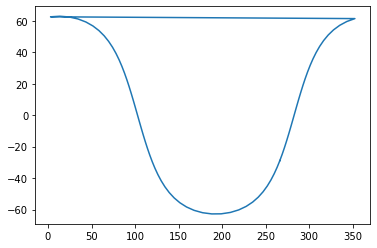

In [13]:
plt.plot(cordline.ra, cordline.dec)
plt.show()

**7) Precess the coordinates from #1 from J2000.0 to J2020.0 (using FK5()).  How big of a shift is it?**

In [14]:
eq7 = SkyCoord(ra=129.456*u.degree, dec=23.92345*u.degree, equinox="J2020.0", frame='fk5')
print("eq1: {}".format(eq1))
print("eq7: {}".format(eq7))

print(eq7.separation(eq1)) #WTH is going on here?

eq1: <SkyCoord (ICRS): (ra, dec) in deg
    (129.456, 23.92345)>
eq7: <SkyCoord (FK5: equinox=J2020.000): (ra, dec) in deg
    (129.456, 23.92345)>
0d16m41.6844s


In [15]:
im, head = fits.getdata('data/DoubleCluster-0023B.fit',0,header=True)

In [16]:
print(np.median(im))
print(np.std(im))

1311.0
666.0628054142195


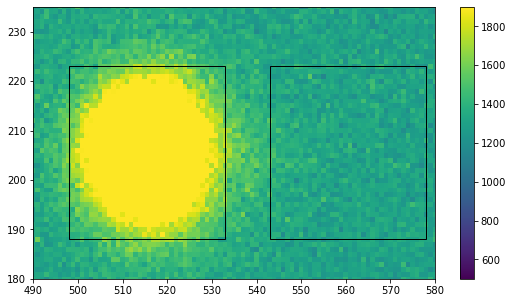

In [17]:
plt.figure(figsize=(9,5))
plt.imshow(im,vmin = 500, vmax=1900,aspect='auto',origin='lower')
plt.colorbar()

star = plt.Rectangle((515-17,205-17), 35, 35, fc="none", ec="black")
plt.gca().add_patch(star)

background = plt.Rectangle((515-17+45,205-17), 35, 35, fc="none", ec="black")
plt.gca().add_patch(background)

plt.xlim(490,580)
plt.ylim(180,235)

plt.show()

In [18]:
total_flux = np.sum(im[188:188+35, 498:498+35])
mean = astropy.stats.sigma_clipped_stats(im[188:188+35,498+45:498+45+35])[0]
N = (35)**2

flux = (total_flux - N*mean)
print(f"star flux: {flux:.0f}")
mag = -2.5*np.log10(flux) + 25
print(f"mag: {mag:.2f}")


star flux: 1240133
mag: 9.77


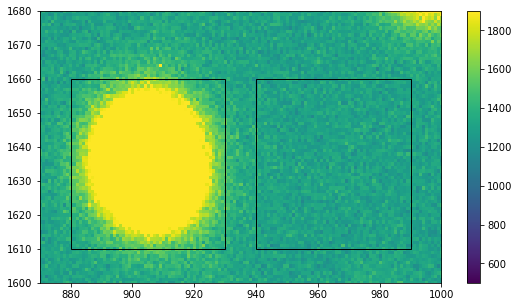

In [19]:
plt.figure(figsize=(9,5))

plt.imshow(im,vmin = 500, vmax=1900,aspect='auto',origin='lower')
plt.colorbar()
# plt.xlim(450,600)
# plt.ylim(170,240)

star = plt.Rectangle((905-25,1635-25), 50, 50, fc="none", ec="black")
plt.gca().add_patch(star)
background = plt.Rectangle((905-25+60,1635-25), 50, 50, fc="none", ec="black")
plt.gca().add_patch(background)

plt.xlim(870,1000)
plt.ylim(1600,1680)

plt.show()

In [20]:
total_flux = np.sum(im[1610:1660, 880:930])
mean = astropy.stats.sigma_clipped_stats(im[1610:1660,880+60:930+60])[0]
N = 50**2
flux = (total_flux - N*mean)
print(f"star flux: {flux:.0f}")
mag = -2.5*np.log10(flux) + 25
print(f"mag: {mag:.2f}")


star flux: 4244493
mag: 8.43


In [23]:
from astropy.constants import mu0
t = 1*u.s
R = 1*u.cm
L = 10*u.cm
I = 100*u.mA
N = 1000

In [30]:
((mu0*N**2 *I*np.pi*R**2)/(L *t)).decompose().to(u.V)

<Quantity 0.00039478 V>

In [26]:
u.V.decompose()

Unit("kg m2 / (A s3)")